In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
def read_all_file_paths(list_of_files:list, start:int=None, end:int=None)->list:
  """
  Read a list of all of the file paths

  Args:
      list_of_files:List

  Returns:
      List
  """
  list_of_dfs = []
  
  if start and end:
    year_columns = [str(year) for year in range(start, end+1)]
  else:
    year_columns = [str(year) for year in range(1950, 2023)]
  
  cols_to_keep = ["country", "debt"] + year_columns
  
  for file in list_of_files:
    
    df = pd.read_csv(file + ".csv", encoding = "ISO-8859-1")
    df.fillna(0, inplace = True)
    df.rename(columns={"country_name":"country", "indicator_name":"debt"}, inplace=True)

    if start and end:
      df.drop(columns=[col for col in df.columns if col not in cols_to_keep], inplace=True, axis=1)
    
    df['std_per_year'] = df[year_columns].std(axis=1)
    
    list_of_dfs.append(df)
  
  return list_of_dfs

def plot_debt_graph(df:pd.DataFrame, start:int, end:int)->None:
  """
  Takes in Dataframe and displays visulization

  Args:
      df (pd.DataFrame)
  """
  year_columns = [str(year) for year in range(start, end+1)]
  # Summing debt across all countries for each year
  annual_debt = df[year_columns].sum()

  # Plotting
  plt.figure(figsize=(15, 6))
  sns.lineplot(x=annual_debt.index, y=annual_debt.values)
  plt.title(f'Total Debt from {start} to {end}')
  plt.xlabel('Year')
  plt.ylabel('Total Debt')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()
  
def plot_by_country_name(country:str, df:pd.DataFrame, start:int, end:int)->None:
    """Plots country debt by name

    Args:
        country (str):
        df (pd.DataFrame):
    """
    
    year_columns = [str(year) for year in range(start, end)]

    # Set the figure size and layout
    plt.figure(figsize=(15, 6))


    country_data = df[df["country"] == country]
    plt.plot(year_columns, country_data[year_columns].values.flatten(), label=country)

    # Adding titles and labels
    plt.title(f'Debt by {country} from {start} to {end}')
    plt.xlabel('Year')
    plt.ylabel('Debt')
    plt.xticks(rotation=45)
    plt.legend()  # Add a legend if the number of countries is manageable
    plt.grid(True)
    plt.show()
      

In [169]:
#Establish intervals
START = 1990
END = 2022

file_paths = [
  'central_government_debt', 
  "household_debt",
  "general_government_debt",
  "non-financial_corporate_debt",
  "private_debt"
  ]

centeral_government, household_debt, general_government_debt, non_financial_debt, private_debt = read_all_file_paths(file_paths,1990,2022)

In [170]:
centeral_government

,country,debt,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std_per_year
0,Afghanistan,Annual average of central government debt (Per...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.700291,9.154083,8.437266,7.997660,7.384413,6.130410,7.397495,0.000000,0.000000,88.715512
1,Albania,Annual average of central government debt (Per...,0.000000,0.000000,0.000000,0.000000,24.629863,29.359587,34.690090,51.409343,...,70.030002,72.670076,72.380044,70.119932,67.610017,65.729868,74.451517,73.162897,66.463658,22.691480
2,Algeria,Annual average of central government debt (Per...,69.043443,71.651909,70.125422,97.528609,97.990658,104.041480,98.409147,86.346375,...,7.658320,8.733314,20.438287,27.241982,38.366454,46.046388,52.009312,62.821924,52.396881,31.734541
3,Angola,Annual average of central government debt (Per...,0.000000,0.000000,0.000000,0.000000,0.000000,181.601989,120.956715,96.592503,...,39.809857,57.093048,75.662637,69.322868,92.995001,113.554175,138.897101,86.860582,67.049940,48.786939
4,Antigua and Barbuda,Annual average of central government debt (Per...,98.070486,99.074392,95.479358,90.146322,89.655473,98.322459,91.673631,87.022284,...,101.369132,99.071288,86.125894,92.192732,87.699587,81.250837,101.476956,102.357629,90.562166,12.092680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vietnam,Annual average of central government debt (Per...,0.000000,220.126738,177.616654,135.146253,105.515032,85.645878,72.907225,58.639728,...,36.986822,39.771071,42.082042,41.109164,39.480846,37.599357,39.016290,38.720767,0.000000,47.083155
169,West Bank and Gaza,Annual average of central government debt (Per...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.952136,37.070953,41.549825,42.660734,44.610042,46.111334,61.216669,64.289084,59.776142,19.370271
170,Yemen,Annual average of central government debt (Per...,91.565431,82.685029,78.022149,76.747380,73.349756,84.107591,114.904993,74.156532,...,48.949944,57.050394,75.348917,83.996819,89.535085,94.609081,98.469524,85.083023,73.531359,21.807994
171,Zambia,Annual average of central government debt (Per...,18.609383,24.551498,2.263348,15.256994,17.716678,24.382074,23.725819,18.412751,...,33.856769,61.868897,58.034613,63.357780,75.229471,94.426069,140.210618,110.789739,0.000000,65.029483


In [177]:
household_debt[household_debt["std_per_year"] >35]

,country,debt,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std_per_year
19,Cyprus,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,62.869385,65.958193,68.995044,...,130.996751,126.425136,115.699815,104.951679,95.761496,86.151251,89.385248,83.014555,0.000000,41.917294
21,Denmark,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,68.406916,73.319871,76.449968,79.401097,...,123.743555,119.223751,117.106531,113.844895,111.928070,110.577359,111.949207,104.287876,86.220814,39.833185
34,Ireland,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,80.392137,55.773150,52.748644,46.672018,41.797931,37.517837,35.365415,30.520804,26.002471,41.871252
74,Switzerland,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,119.550265,122.321201,123.749092,126.157987,124.921835,126.327073,134.506898,131.751398,128.298231,52.370941
77,Thailand,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,79.726248,81.161613,79.394403,78.131096,78.354182,79.867038,89.577417,90.166434,86.899036,35.950458


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


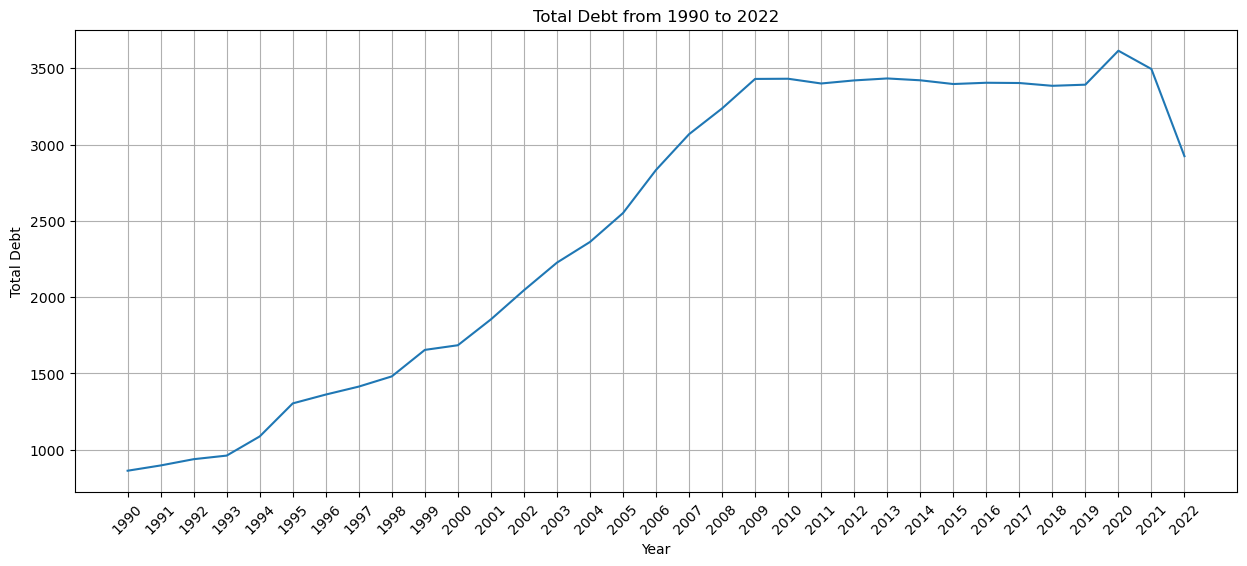

In [178]:
plot_debt_graph(household_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


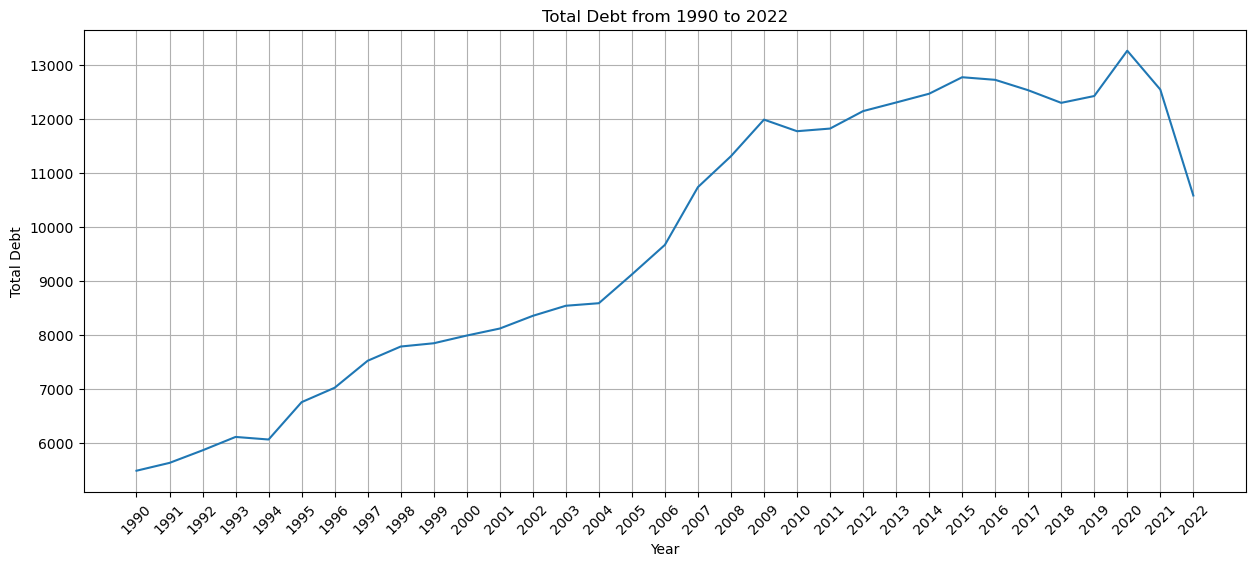

In [179]:
plot_debt_graph(private_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


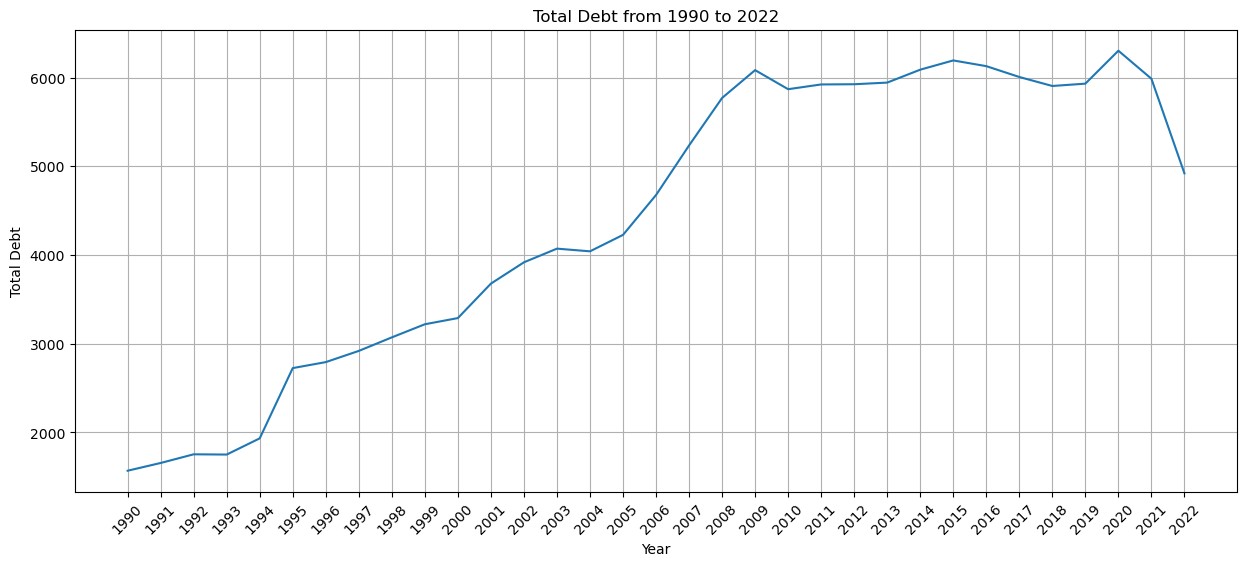

In [180]:
plot_debt_graph(non_financial_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


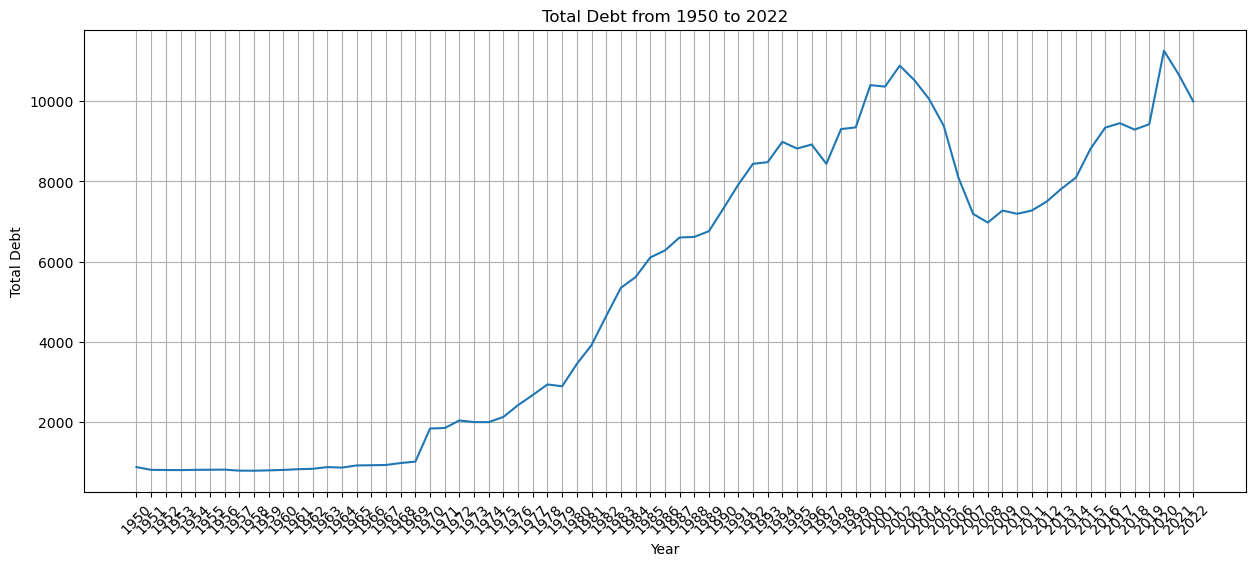

In [78]:
plot_debt_graph(centeral_government)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


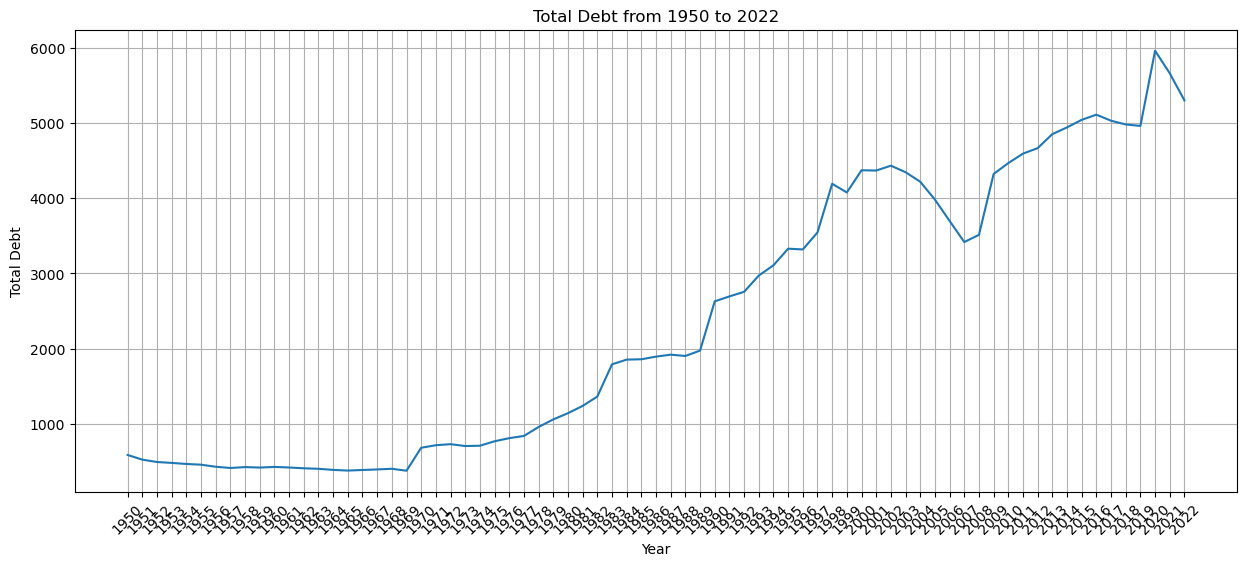

In [79]:
plot_debt_graph(general_government_debt)

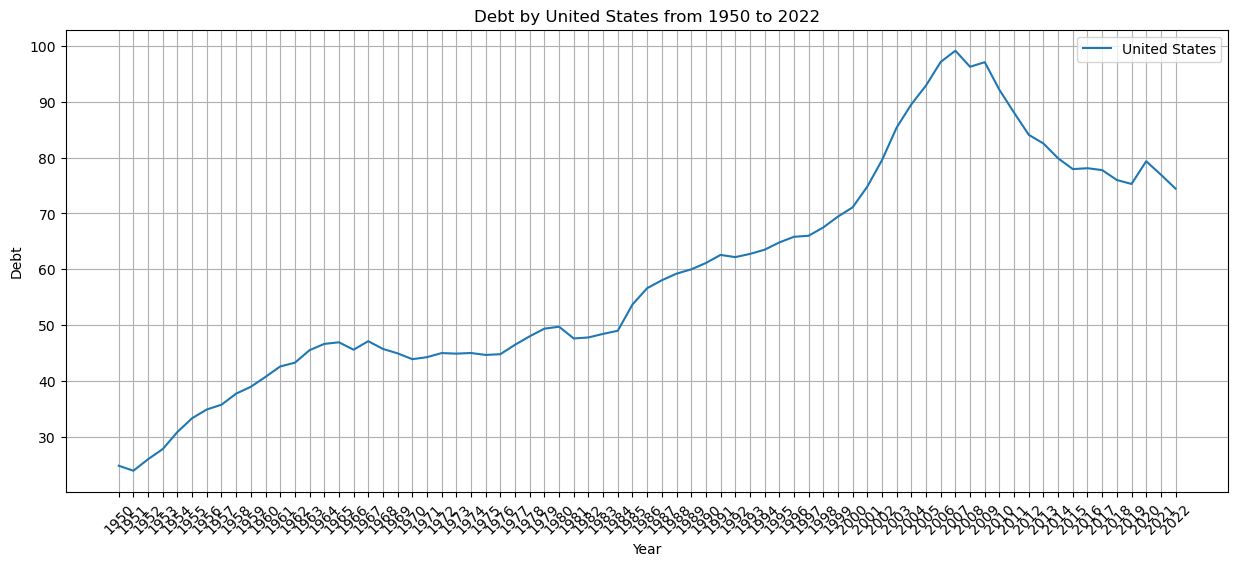

In [80]:
plot_by_country_name("United States", household_debt)

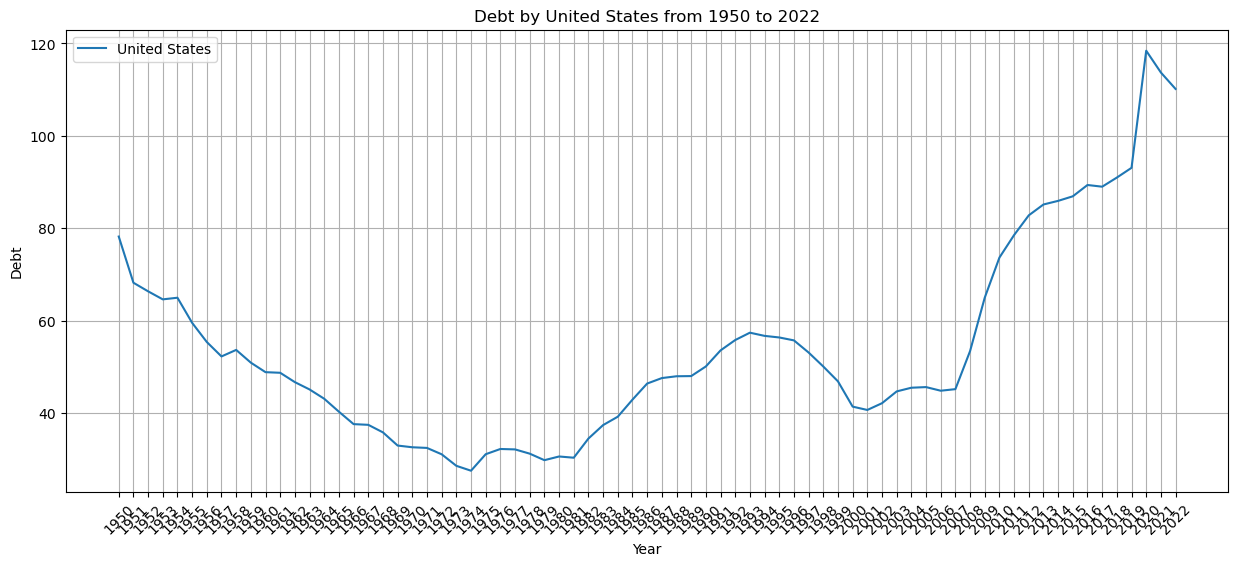

In [81]:
plot_by_country_name("United States", centeral_government)

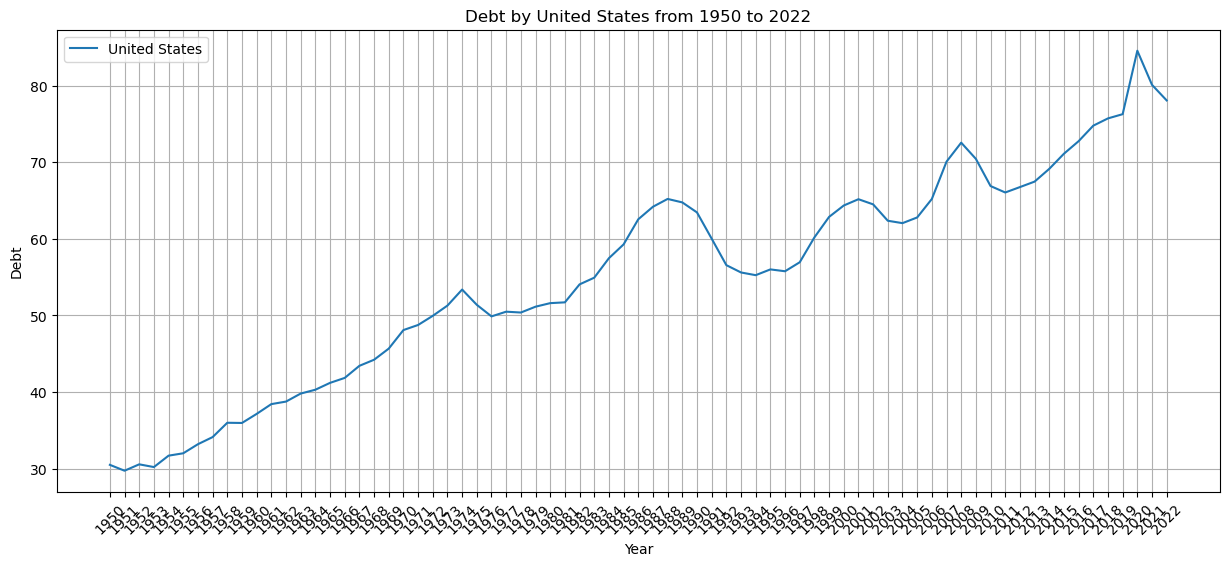

In [82]:
plot_by_country_name("United States", non_financial_debt)

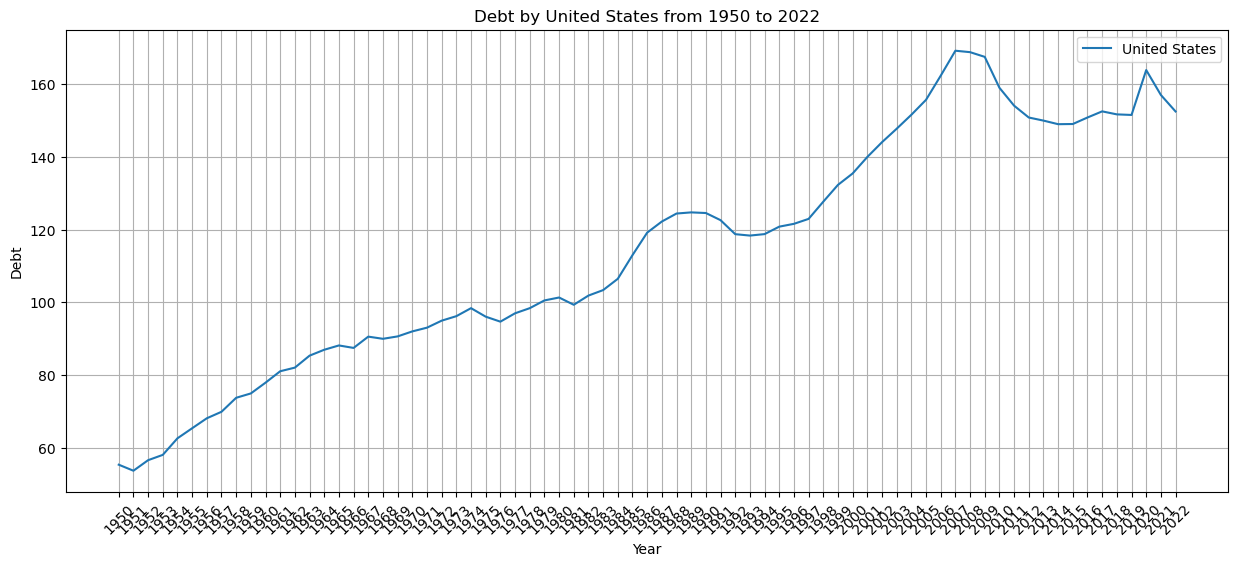

In [83]:
plot_by_country_name("United States", private_debt)

In [97]:
household_debt

,country,debt,1950,1951,1952,1953,1954,1955,1956,1957,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std
0,Afghanistan,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.697100,0.577473,0.648992,0.652998,0.669492,0.565135,0.544819,0.000000,0.000000,NaN
1,Albania,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.729247,11.276374,11.273276,11.321095,11.137844,11.494039,12.628963,12.295268,12.531274,NaN
2,Argentina,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.720705,6.352101,5.956233,6.914792,6.566565,5.314137,5.510188,4.525431,4.074608,NaN
3,Australia,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,115.536449,121.059943,123.677817,122.988365,122.268566,119.082593,122.537046,118.208377,111.751978,NaN
4,Austria,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.242221,50.138075,50.230140,49.537066,48.926985,48.890197,52.442444,51.387583,48.187172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Ukraine,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.316687,8.795559,6.856581,5.842179,5.653822,5.353357,4.901668,4.672354,4.523612,NaN
80,United Arab Emirates,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.710653,24.321224,25.600513,23.534887,21.514673,21.654104,25.671165,22.806818,20.106850,NaN
81,United Kingdom,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.177177,86.589106,86.481457,85.827393,85.434155,84.000075,91.009028,86.881290,83.165809,NaN
82,United States,"Annual average of household debt, loans and de...",24.802614,23.91165,25.976296,27.794074,30.862721,33.318558,34.880478,35.738266,...,79.869920,77.942384,78.098646,77.759808,75.986963,75.276262,79.348115,76.944509,74.438409,NaN
